# Section 01: Exploratory Analysis

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [147]:
filename = "/home/andres/Downloads/marketing_analytics_project/marketing_data.csv"

In [148]:
df = pd.read_csv(filename)

In [149]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Are there any null values?

In [150]:
# Identify missing values
missing_data = df.isnull()

# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    2240
Name: ID, dtype: int64

Year_Birth
False    2240
Name: Year_Birth, dtype: int64

Education
False    2240
Name: Education, dtype: int64

Marital_Status
False    2240
Name: Marital_Status, dtype: int64

 Income 
False    2216
True       24
Name:  Income , dtype: int64

Kidhome
False    2240
Name: Kidhome, dtype: int64

Teenhome
False    2240
Name: Teenhome, dtype: int64

Dt_Customer
False    2240
Name: Dt_Customer, dtype: int64

Recency
False    2240
Name: Recency, dtype: int64

MntWines
False    2240
Name: MntWines, dtype: int64

MntFruits
False    2240
Name: MntFruits, dtype: int64

MntMeatProducts
False    2240
Name: MntMeatProducts, dtype: int64

MntFishProducts
False    2240
Name: MntFishProducts, dtype: int64

MntSweetProducts
False    2240
Name: MntSweetProducts, dtype: int64

MntGoldProds
False    2240
Name: MntGoldProds, dtype: int64

NumDealsPurchases
False    2240
Name: NumDealsPurchases, dtype: int64

NumWebPurchases
False    2240
Name: NumWebPurchases, dtype

We can see that the field "Income" has 24 missing values.

### Are there any outliers?

In [180]:
# calculate the quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# calculate the number of outliers for every field
num_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
num_outliers = num_outliers.sort_values(ascending=False)
num_outliers

Response               334
MntSweetProducts       248
MntFruits              227
MntFishProducts        223
MntGoldProds           207
MntMeatProducts        175
AcceptedCmp4           167
AcceptedCmp3           163
AcceptedCmp5           163
AcceptedCmp1           144
NumDealsPurchases       86
MntWines                35
AcceptedCmp2            30
NumCatalogPurchases     23
Complain                21
Income                   8
NumWebVisitsMonth        8
NumWebPurchases          4
Year_Birth               3
Kidhome                  0
Education                0
Dt_Customer              0
Country                  0
Marital_Status           0
Total Purchases          0
Recency                  0
Teenhome                 0
NumStorePurchases        0
ID                       0
dtype: int64

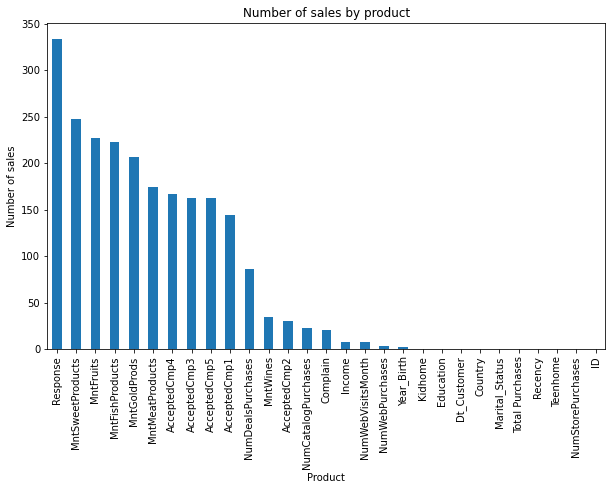

In [179]:
# grafico la cantidad de outliers
g = num_outliers.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.title('Number of sales by product')
_ = plt.setp(g.get_xticklabels(), rotation=90)

We can see that the variable "Response" has the most outliers, followed by the amount of purchases made and the success of each campaign.<br>
We can visualize those outliers using box plots, for example for the fields "Year_Birth" and "Complain":

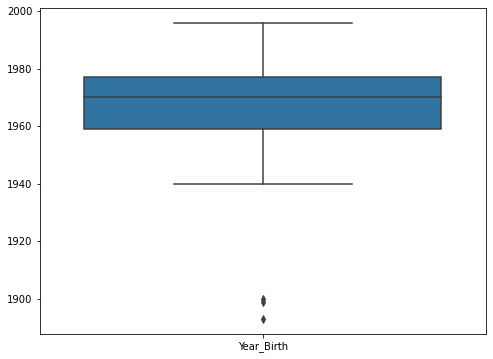

In [152]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.boxplot(data = df[['Year_Birth']], ax=ax)

# an alternative
#df[['Year_Birth']].plot(kind='box')

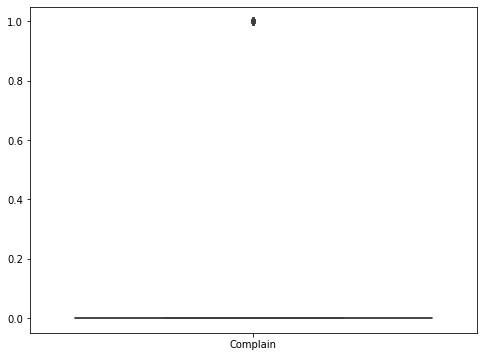

In [153]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = sns.boxplot(data = df[['Complain']], ax=ax)

### Handling missing values and outliers

Missing values: por ahora los voy a dejar, y más adelante veo si los tiro

Outliers: idem. Hasta no saber qué análisis voy a hacer, no puedo saber si me van a producir un sesgo

### Are there any variables that warrant transformations?

No sé de qué habla

### Are there any useful variables that you can engineer with the given data?

Volver sobre esto más adelante. Ahora todavía ni conozco el dataset.

### Do you notice any patterns or anomalies in the data? Can you plot them?

In [154]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
# al income hay que sacarle el signo pesos (esto hay que hacerlo al ppio)
display(list(df.columns.values))

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 ' Income ',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [156]:
df[' Income '] = df[' Income '].str.replace('$', '')

# ojo que también hay que sacarle la coma porque sino no lo entiende como número
df[' Income '] = df[' Income '].str.replace(',', '')

# también tiene un espacio al final que impide convertir a número
df[' Income '] = df[' Income '].str.replace(' ', '')

In [157]:
display(df.dtypes)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [158]:
# income es un object y hay que convertirlo a int o float
df[" Income "] = df[" Income "].astype(str).astype(float)

In [159]:
# la columna Income tiene espacios en el header
df.rename(columns = {' Income ':'Income'}, inplace = True)
display(list(df.columns.values))

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

Por ahora no me doy cuenta de nada más, pero más adelante puedo volver sobre esto

# Section 02: Statistical Analysis

### What factors are significantly related to the number of store purchases?

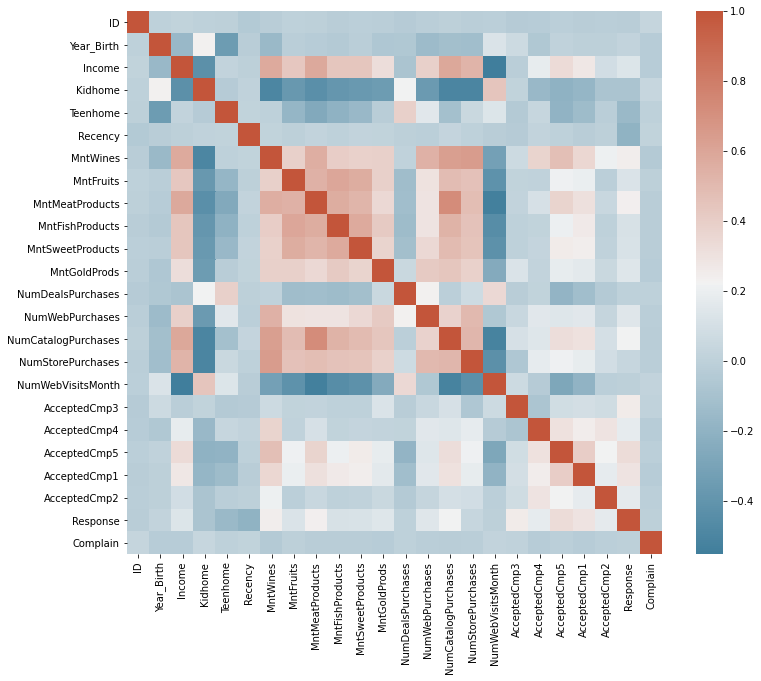

In [160]:
# First we visualize the correlation between all variables
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
_ = sns.heatmap(corr, annot=False, cmap=cmap)

Cómo determinar qué valores de correlación son significativos: hay distintas maneras. En un artículo proponen la siguiente guía: mayor que 0.5: grande. Entre 0.3 y 0.5: moderada. Menor a 0.3, pequena.
https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

Creo que lo más serio es mirar el p-value.

Por ahora me quedo con las variables que tienen correlación mayor a 0.5:

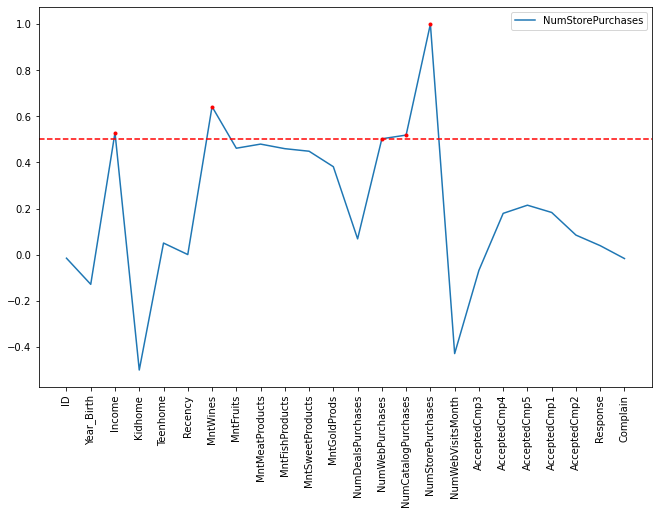

In [161]:
# Now we plot the correlation between "NumStorePurchases" and all the other variables
c = corr[['NumStorePurchases']]
ind = c.ge(0.5)

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=corr[['NumStorePurchases']], ax=ax)
_ = plt.setp(g.get_xticklabels(), rotation=90)

_ = plt.plot(c[ind], '.r')
_ = plt.axhline(0.5, xmin=0, xmax=1, color = 'r', linestyle='--')

In [162]:
ind[ind.values  == True]

,NumStorePurchases
Income,True
MntWines,True
NumWebPurchases,True
NumCatalogPurchases,True
NumStorePurchases,True


We can see that the number of store purchases is significantly related to customer's income, the amount spent on wine in the last 2 years, the number of purchases made through the company's web site, the number of purchases made using a catalog, and the number of purchases made directly in stores.

### Does US fare significantly better than the Rest of the World in terms of total purchases?

Se refiere al número de ventas o al valor de las ventas?

De dinero gastado tengo solamente los últimos 2 anos, y no sé si en todas las ramas

El número de purchases en ppio parece ser en total, no sólo los últimos 2 anos

In [163]:
# me armo un df que tenga sólo con las compras totales y el país

# acá estoy haciendo ingeniería de una nueva variable
df['Total Purchases']= df.iloc[:, 16:19].sum(axis=1)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,14
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,17
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,10
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,3
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,6


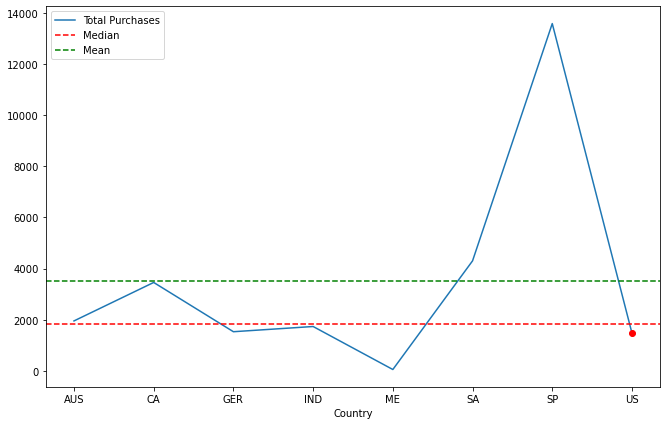

In [164]:
# Ahora agrupo por país

#df.groupby(['Country']).sum()

purchases_by_country = df[['Total Purchases', 'Country']].groupby(['Country']).sum()

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=purchases_by_country, ax=ax)
_ = plt.plot(purchases_by_country.iloc[[-1]], 'or')

# calculate median purchases by country
median_purchases = purchases_by_country['Total Purchases'].median()
mean_purchases = purchases_by_country['Total Purchases'].mean()

_ = plt.axhline(median_purchases, xmin=0, xmax=1, color = 'r', linestyle='--', label='Median')
_ = plt.axhline(mean_purchases, xmin=0, xmax=1, color = 'g', linestyle='--', label='Mean')
_ = ax.legend()

We can see that the US is having little sales compared to the rest of the world. It is below the median and below the mean.

### Is there a significant relationship between geographical region and success of a campaign?
La variable "response" me dice si hubo una venta producto de la campana, así que miro la cantidad de éxitos por país.

Pero hay que tener en cuenta cuánta gente vio la campana

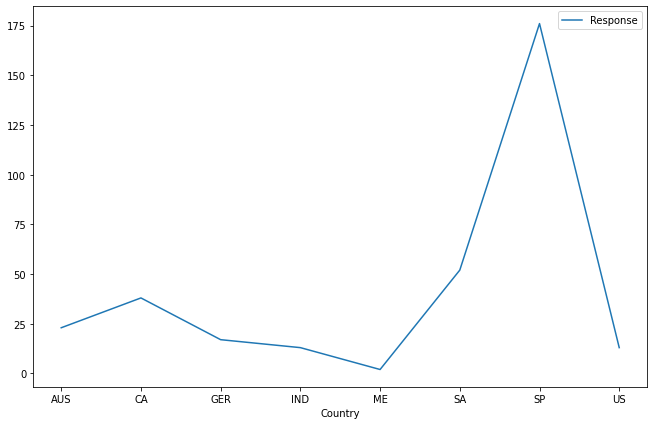

In [165]:
response_by_country = df[['Response', 'Country']].groupby(['Country']).sum()

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=response_by_country, ax=ax)

Se ve que en Espana se vendió mucho más. Pero no es que haya una correlación con la ubicación geográfica.

### What factors are significantly related to amount spent on fish?
Me propone que considere "married phd candidates" y que piense otras, considerando interaction/effects (?)

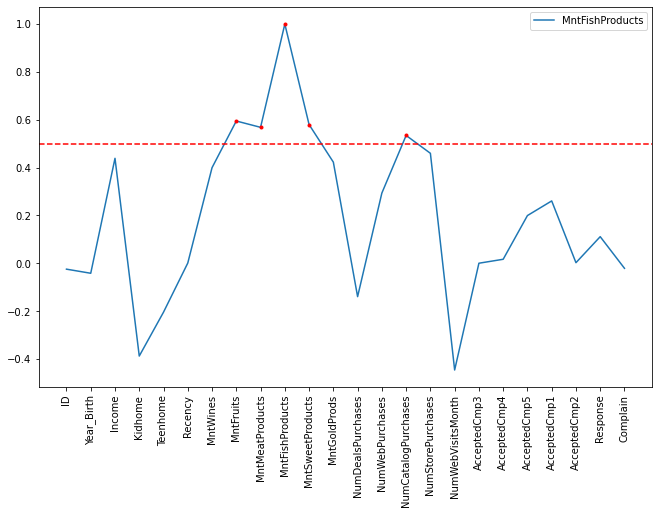

In [166]:
# veo qué cosas están más correlacionadas con "MntFishProducts"

c = corr[['MntFishProducts']]
ind = c.ge(0.5)

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=corr[['MntFishProducts']], ax=ax)
_ = plt.setp(g.get_xticklabels(), rotation=90)

_ = plt.plot(c[ind], '.r')
_ = plt.axhline(0.5, xmin=0, xmax=1, color = 'r', linestyle='--')

In [167]:
ind[ind.values  == True]

,MntFishProducts
MntFruits,True
MntMeatProducts,True
MntFishProducts,True
MntSweetProducts,True
NumCatalogPurchases,True


We see that the amount spent on fish is significantly related to the amount spent on fruit, meat, fish, sweets, and the number of purchases made using a catalog.

Queda pendiente encontrarle sentido al planteo de la consigna.

### Justify or refute the statement about gold
No entiendo por qué interpreta conservadurismo como comprar más.

# Section 03: Data Visualization

### Which marketing campaign is most successful?

In [168]:
# hago un recuento de cuántas ventas hubo en cada campana

sales_by_campaign = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
sales_by_campaign = sales_by_campaign.sort_values(ascending=False)
sales_by_campaign

AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp3    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

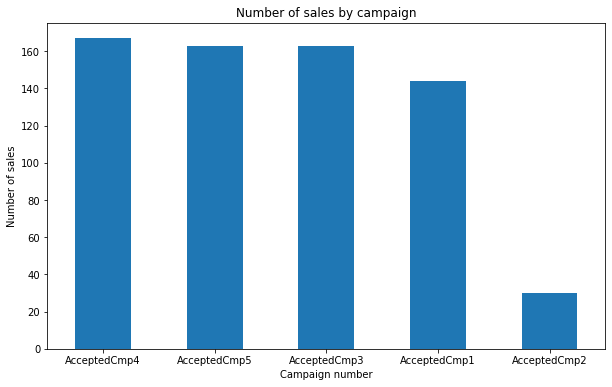

In [169]:
g = sales_by_campaign.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Campaign number')
plt.ylabel('Number of sales')
plt.title('Number of sales by campaign')
_ = plt.setp(g.get_xticklabels(), rotation=0)

We can see that the fourth campaign was the most successful, although the third and fifth had very similar success.

The first campaign was also very successful, while only the second one had a poor performance. This suggests a hidden bias in the data.

### What does the average customer look like for this company?

Me tengo que quedar con todos aquellos que compraron, es decir aquellos que tienen "Response" igual a 1.

In [170]:
df_customers = df[df['Response'] == 1]
df_customers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total Purchases
count,334.000000,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000
mean,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,1.0,0.008982,15.371257
std,3154.132439,12.398192,23194.080987,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,...,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.0,0.094489,6.827775
min,1.000000,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,3.000000
25%,2785.250000,1959.000000,39763.000000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,10.000000
50%,5133.000000,1971.000000,64090.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,...,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,16.000000
75%,8127.750000,1979.000000,80589.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,...,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,21.000000
max,11133.000000,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,...,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,32.000000


The average customer was born in 1969, has an average of 0.3 kids and 0.3 teens in the household. Ojo que para no dar pibes fraccionarios se puede usar la mediana.

El sueldo del cliente promedio es de aprox. $60000 anual.

Me quedo sólo con la descripción del sujeto, no con lo que consumió. Queda ver: educación, marital status, income

In [171]:
df_customers[['Education']].value_counts()

Education 
Graduation    152
PhD           101
Master         57
2n Cycle       22
Basic           2
dtype: int64

The majority of customers has a degree, followed by those who have a PhD.

In [172]:
df_customers[['Marital_Status']].value_counts()

Marital_Status
Single            106
Married            98
Together           60
Divorced           48
Widow              19
YOLO                1
Alone               1
Absurd              1
dtype: int64

The majority of customers are either single or married

### Which products are performing best?

In [173]:
# calculo las ventas totales de cada producto, igual que con las campanas

sales_by_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
sales_by_product = sales_by_product.sort_values(ascending=False)
sales_by_product

MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64

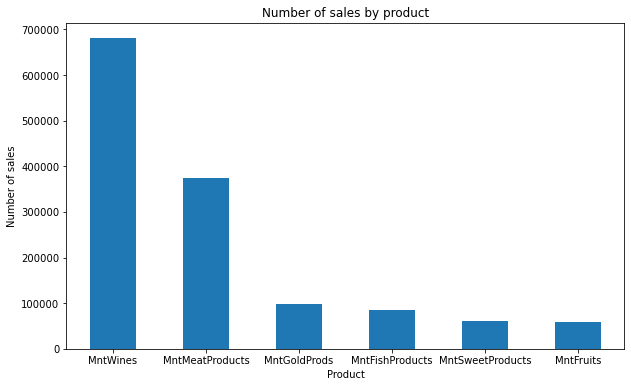

In [174]:
g = sales_by_product.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.title('Number of sales by product')
_ = plt.setp(g.get_xticklabels(), rotation=0)

By far the best performing product is wine, at least in number of purchases. (La cantidad de dinero no la tengo)

### Which channels are underperforming?

In [175]:
sales_by_channel = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
sales_by_channel = sales_by_channel.sort_values(ascending=False)
sales_by_channel

NumStorePurchases      12970
NumWebPurchases         9150
NumCatalogPurchases     5963
dtype: int64

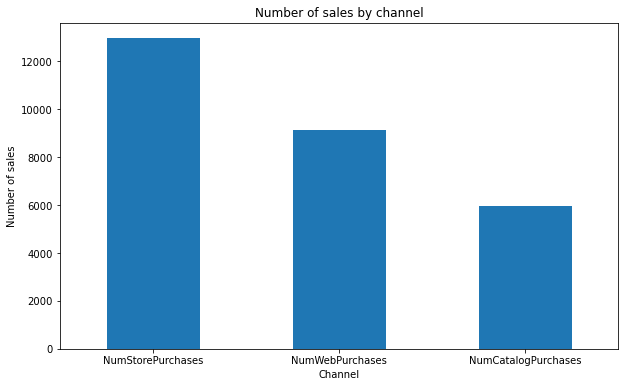

In [176]:
g = sales_by_channel.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Channel')
plt.ylabel('Number of sales')
plt.title('Number of sales by channel')
_ = plt.setp(g.get_xticklabels(), rotation=0)

Both the "web" and the "catalog" channel are underperforming compared to the "store" channel.

# Section 04: CMO Recommendations

De la sección 1 (análisis exploratorio) no veo nada para comentar.

Sección 3: meterle pila a las ventas por web y por catálogo. Con el desempeno comparativo de cada producto qué se puede hacer?

Sobre las campanas, está bien hacer 5, porque en cada nueva campana se vende igual cantidad (salvo el bias raro de la 2da)

Sección 2: sobre el desempeno comparativo de cada país qué se puede hacer?

Sobre las causas (correlaciones) de store purchases no sé qué hacer.

Idem con ventas de pescado